#  Apprentice Chef

<b> Overview Steps </b>

1. Preparation (Importing Package + Dataset)
2. Making Additional Features
3. Flagging Outliers (Setting Threshold)
4. Flagging Trend Changes (Setting Threshold)
5. Modelling

<h1> Data Preparation </h1> 

Data preparation is done by importing necessary packages and also the file itself.

A very simple straight process that is essential to every project.

In [2]:
##############################################################################
## 1. Preparation                                                           ##
##############################################################################
import pandas as pd # data science essentials
from sklearn.model_selection import train_test_split # train/test split
import sklearn.linear_model  # linear regression (scikit-learn)
from sklearn.ensemble import GradientBoostingRegressor # gradient booster (scikit-learn)
import statsmodels.formula.api as smf # linear regression (statsmodels)
import time


# import dataset
file = 'Apprentice_Chef_Dataset.xlsx'

original_df = pd.read_excel(file)

<h1> Making Additional Features </h1> 

This process is done to explore the dataset even further. 

Creating additional features in this step requires some business knowledge on the features itself.

There are 2 main new features.

The first feature is separating the drink and food from the total ordered. It does not make sense since the spending average per customer exceeds the maximum price of a meal that is offered. That is why, the drink spending feature is created.

The second feature is separating the email domains, between personal, junk, and professional. It is believed that in professional and/or personal accounts, people will tend to spend more.

In [3]:
##############################################################################
## 2. Making Additional Features                                            ##
##############################################################################

# Price Feature

original_df['price'] = original_df['REVENUE'] / original_df['TOTAL_MEALS_ORDERED']

# Expected price of meal price for making drink ordered feature

expected_price = (10+23)/2

# Drink Ordered Feature

original_df['expected_drink'] = original_df['price'] - expected_price 

drink_ordered = []
for i in original_df['expected_drink']:
    if i > 0:
        temp = i
        drink_ordered.append(temp)
    else:
        temp = 0
        drink_ordered.append(temp) 
        
    

original_df['drink_ordered'] = drink_ordered


In [4]:
###### Email Domain Engineering Part 1 ###### 

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in original_df.iterrows():
    
    # splitting email domain at '@'
    split_email = original_df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df.columns = ['name','email']


# concatenating personal_email_domain with friends DataFrame
original_df = pd.concat([original_df, email_df],
                   axis = 1)

In [5]:
###### Email Domain Engineering Part 2 ###### 


personal_email = ['@gmail.com','@protonmail.com','@yahoo.com']

junk_email = ['@msn.com','@aol.com','@passport.com','@hotmail.com','@live.com','@me.com']


work_email = ['@amex.com',"@cocacola.com",'@jnj.com','@mcdonalds.com',
             '@merck.com','@nike.com','@apple.com','@ge.org','@dupont.com',
             '@ibm.com','@chevron.com','@microsoft.com','@unitedhealth.com',
             '@exxon.com','@travelers.com','@boeing.com','@pg.com','@caterpillar.com',
             '@verizon.com','@mmm.com','@walmart.com','@disney.com','@pfizer.com',
             '@visa.com','@jpmorgan.com','@cisco.com','@goldmansacs.com',
             '@unitedtech.com','@intel.com','@homedepot.com']

# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in original_df['email']:
        if "@" + domain in personal_email:
            placeholder_lst.append('personal')
            
        elif "@"+ domain in work_email:
            placeholder_lst.append('work')
            
        elif "@" + domain in junk_email:
            placeholder_lst.append('junk')
            
        else:
            print('Unknown')
            
# concatenating with original DataFrame
original_df['domain_group'] = pd.Series(placeholder_lst)

In [6]:
###### Email Domain Engineering Part 3 ###### 

# placeholder list
placeholder_lst = []

# looping to group observations by domain type
for i in original_df['domain_group']:
        if i == "work" :
            placeholder_lst.append(1)
            
        elif i == "personal":
            placeholder_lst.append(0)
        
        elif i == "junk":
            placeholder_lst.append(2)
            
        else:
            print('Unknown')
            
# concatenating with original DataFrame
original_df['domain_group_numeric'] = pd.Series(placeholder_lst)

<h1> Feature Engineering </h1> 

This process is done to identify outlying data and trends that generally disrupts the average type of customer,
however if analyzed even further, it might give benefits of understanding other type of customers.

The outliers and trends are then flagged and analyzed separately.

Typically, a 95% percentile range are used for the outliers, however some exceptions are made since it shows better results after several trial and errors.

In [7]:
##############################################################################
## Feature Engineering (Outlier Thresholds)                                 ##
##############################################################################

out_revenue_hi = 2300 
out_total_meals_ordered_hi = original_df['TOTAL_MEALS_ORDERED'].quantile(0.95)
out_unique_meals_purch_hi = original_df['UNIQUE_MEALS_PURCH'].quantile(0.95)
out_contacts_w_customer_service_lo = original_df['CONTACTS_W_CUSTOMER_SERVICE'].quantile(0.025)
out_contacts_w_customer_service_hi = original_df['CONTACTS_W_CUSTOMER_SERVICE'].quantile(0.975)
out_avg_time_per_site_visit_hi = original_df['AVG_TIME_PER_SITE_VISIT'].quantile(0.95)
out_cancellations_before_noon_hi = original_df['CANCELLATIONS_BEFORE_NOON'].quantile(0.95)
out_cancellations_after_noon_hi = original_df['CANCELLATIONS_AFTER_NOON'].quantile(0.95)
out_mobile_logins_lo = original_df['MOBILE_LOGINS'].quantile(0.025)
out_mobile_logins_hi = original_df['MOBILE_LOGINS'].quantile(0.975)
out_pc_logins_lo = original_df['PC_LOGINS'].quantile(0.025)
out_pc_logins_hi = original_df['PC_LOGINS'].quantile(0.975)
out_weekly_plan_hi = original_df['WEEKLY_PLAN'].quantile(0.95)
out_early_deliveries_hi = original_df['EARLY_DELIVERIES'].quantile(0.95)
out_late_deliveries_hi =original_df['LATE_DELIVERIES'].quantile(0.95)
out_refrigerated_locker_hi = original_df['REFRIGERATED_LOCKER'].quantile(0.95)
out_followed_recommendations_pct_lo = original_df['FOLLOWED_RECOMMENDATIONS_PCT'].quantile(0.025)
out_followed_recommendations_pct_hi = original_df['FOLLOWED_RECOMMENDATIONS_PCT'].quantile(0.975)
out_avg_prep_vid_time_hi = original_df['AVG_PREP_VID_TIME'].quantile(0.95)
out_largest_order_size_lo = original_df['LARGEST_ORDER_SIZE'].quantile(0.05)
out_largest_order_size_hi = original_df['LARGEST_ORDER_SIZE'].quantile(0.975)
out_median_meal_rating_lo = original_df['MEDIAN_MEAL_RATING'].quantile(0.025)
out_median_meal_rating_hi = original_df['MEDIAN_MEAL_RATING'].quantile(0.975)
out_avg_clicks_per_visit_lo = original_df['AVG_CLICKS_PER_VISIT'].quantile(0.025)
out_avg_clicks_per_visit_hi = original_df['AVG_CLICKS_PER_VISIT'].quantile(0.975)
out_total_photos_viewed_lo = original_df['TOTAL_PHOTOS_VIEWED'].quantile(0.025)
out_total_photos_viewed_hi = original_df['TOTAL_PHOTOS_VIEWED'].quantile(0.975)
out_drink_ordered_hi = 30
out_price_hi = 60

In [8]:
##### Developing Features (Columns) for Outliers #####

# Revenue
original_df['out_revenue'] = 0
condition_hi = original_df.loc[0:,'out_revenue'][original_df['REVENUE'] > out_revenue_hi]

original_df['out_revenue'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Total Meals Ordered
original_df['out_total_meals_ordered'] = 0
condition_hi = original_df.loc[0:,'out_total_meals_ordered'][original_df['TOTAL_MEALS_ORDERED'] > out_total_meals_ordered_hi]

original_df['out_total_meals_ordered'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Unique Meals Purchased 
original_df['out_unique_meals_purch'] = 0
condition_hi = original_df.loc[0:,'out_unique_meals_purch'][original_df['UNIQUE_MEALS_PURCH'] > out_unique_meals_purch_hi]

original_df['out_unique_meals_purch'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Contacts With Customer Service
original_df['out_unique_meals_purch'] = 0
condition_lo = original_df.loc[0:,'out_unique_meals_purch'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] < out_contacts_w_customer_service_lo]
condition_hi = original_df.loc[0:,'out_unique_meals_purch'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > out_contacts_w_customer_service_hi]

original_df['out_unique_meals_purch'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

original_df['out_unique_meals_purch'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

# Average Time per Site Visit
original_df['out_avg_time_per_site_visit'] = 0
condition_hi = original_df.loc[0:,'out_avg_time_per_site_visit'][original_df['AVG_TIME_PER_SITE_VISIT'] > out_avg_time_per_site_visit_hi]

original_df['out_avg_time_per_site_visit'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Cancellations Before Noon
original_df['out_cancellations_before_noon'] = 0
condition_hi = original_df.loc[0:,'out_cancellations_before_noon'][original_df['CANCELLATIONS_BEFORE_NOON'] > out_cancellations_before_noon_hi]

original_df['out_cancellations_before_noon'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Cancellations After Noon
original_df['out_cancellations_after_noon'] = 0
condition_hi = original_df.loc[0:,'out_cancellations_after_noon'][original_df['CANCELLATIONS_AFTER_NOON'] > out_cancellations_after_noon_hi]

original_df['out_cancellations_before_noon'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Mobile Logins
original_df['out_mobile_logins'] = 0
condition_lo = original_df.loc[0:,'out_mobile_logins'][original_df['MOBILE_LOGINS'] < out_mobile_logins_lo]
condition_hi = original_df.loc[0:,'out_mobile_logins'][original_df['MOBILE_LOGINS'] > out_mobile_logins_hi]

original_df['out_mobile_logins'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

original_df['out_mobile_logins'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

# PC Logins
original_df['out_pc_logins'] = 0
condition_lo = original_df.loc[0:,'out_pc_logins'][original_df['PC_LOGINS'] < out_pc_logins_lo]
condition_hi = original_df.loc[0:,'out_pc_logins'][original_df['PC_LOGINS'] > out_pc_logins_hi]

original_df['out_pc_logins'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

original_df['out_pc_logins'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

# Weekly Plan
original_df['out_weekly_plan'] = 0
condition_hi = original_df.loc[0:,'out_weekly_plan'][original_df['WEEKLY_PLAN'] > out_weekly_plan_hi]

original_df['out_weekly_plan'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Early Deliveries
original_df['out_early_deliveries'] = 0
condition_hi = original_df.loc[0:,'out_early_deliveries'][original_df['EARLY_DELIVERIES'] > out_early_deliveries_hi]

original_df['out_early_deliveries'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Late Deliveries
original_df['out_late_deliveries'] = 0
condition_hi = original_df.loc[0:,'out_late_deliveries'][original_df['LATE_DELIVERIES'] > out_late_deliveries_hi]

original_df['out_late_deliveries'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Refrigerated Locker 
original_df['out_refrigerated_locker'] = 0
condition_hi = original_df.loc[0:,'out_refrigerated_locker'][original_df['REFRIGERATED_LOCKER'] > out_refrigerated_locker_hi]

original_df['out_refrigerated_locker'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Followed Recommendations PCT
original_df['out_followed_recommendations_pct'] = 0
condition_lo = original_df.loc[0:,'out_followed_recommendations_pct'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] < out_followed_recommendations_pct_lo]
condition_hi = original_df.loc[0:,'out_followed_recommendations_pct'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] > out_followed_recommendations_pct_hi]

original_df['out_followed_recommendations_pct'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

original_df['out_followed_recommendations_pct'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

# Average Prep Time Vid  
original_df['out_avg_prep_vid_time'] = 0
condition_hi = original_df.loc[0:,'out_avg_prep_vid_time'][original_df['AVG_PREP_VID_TIME'] > out_avg_prep_vid_time_hi]

original_df['out_avg_prep_vid_time'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Largest Order Size
original_df['out_largest_order_size'] = 0
condition_lo = original_df.loc[0:,'out_largest_order_size'][original_df['LARGEST_ORDER_SIZE'] < out_largest_order_size_lo]
condition_hi = original_df.loc[0:,'out_largest_order_size'][original_df['LARGEST_ORDER_SIZE'] > out_largest_order_size_hi]

original_df['out_largest_order_size'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

original_df['out_largest_order_size'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

# Median Meal Rating
original_df['out_median_meal_rating'] = 0
condition_lo = original_df.loc[0:,'out_median_meal_rating'][original_df['MEDIAN_MEAL_RATING'] < out_median_meal_rating_lo]
condition_hi = original_df.loc[0:,'out_median_meal_rating'][original_df['MEDIAN_MEAL_RATING'] > out_median_meal_rating_hi]

original_df['out_median_meal_rating'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

original_df['out_median_meal_rating'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

# Average Clicks per Visit
original_df['out_avg_clicks_per_visit'] = 0
condition_lo = original_df.loc[0:,'out_avg_clicks_per_visit'][original_df['AVG_CLICKS_PER_VISIT'] < out_avg_clicks_per_visit_lo]
condition_hi = original_df.loc[0:,'out_avg_clicks_per_visit'][original_df['AVG_CLICKS_PER_VISIT'] > out_avg_clicks_per_visit_hi]

original_df['out_avg_clicks_per_visit'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

original_df['out_avg_clicks_per_visit'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

# Average Clicks per Visit
original_df['out_total_photos_viewed'] = 0
condition_lo = original_df.loc[0:,'out_total_photos_viewed'][original_df['TOTAL_PHOTOS_VIEWED'] < out_total_photos_viewed_lo]
condition_hi = original_df.loc[0:,'out_total_photos_viewed'][original_df['TOTAL_PHOTOS_VIEWED'] > out_total_photos_viewed_hi]

original_df['out_total_photos_viewed'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

original_df['out_total_photos_viewed'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

# Drink Ordered
original_df['out_drink_ordered'] = 0
condition_hi = original_df.loc[0:,'out_drink_ordered'][original_df['drink_ordered'] > out_drink_ordered_hi]

original_df['out_drink_ordered'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Price
original_df['out_price'] = 0
condition_hi = original_df.loc[0:,'out_price'][original_df['out_price'] > out_price_hi]

original_df['out_price'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

In [9]:
##############################################################################
## Feature Engineering (Trend Thresholds)                                   ##
##############################################################################

total_meals_ordered_hi = 200 # data scatters above this point
unique_meals_purch_hi = 9 # trend changes above this point
contacts_w_customer_service_hi = 10 # trend changes above this point
avg_time_per_site_visit_hi = 300 # data scatters above this point
cancellations_before_noon_hi = 8 # data scatters above this point
cancellations_after_noon_hi = 2 # data scatters above this point
weekly_plan_hi = 15 # data scatters above this point
early_deliveries_hi = 5 # data scatters above this point
late_deliveries_hi = 10 # trend changes above this point
followed_recommendations_pct_hi = 80 # trend changes above this point
avg_prep_vid_time_hi = 300 # data scatters above this point
largest_order_size_hi = 8 # trend changes above this point
master_classes_attended_hi = 2 # data scatters above this point
median_meal_rating_hi = 4.5 # trend changes above this point
avg_clicks_per_visit_hi = 10 # trend changes above this point
total_photos_viewed_hi = 700 # trend changes above this point
drink_ordered_hi = 40  # data scatters above this point
price_hi = 40 # data scatters above this point



unique_meals_purch_at = 1 # one inflated
product_categories_viewed_at = 5 # different trend at 5
cancellations_before_noon_at = 6 #trend changes at 6
pc_logins_at_lo = 3  # trend changes above this point
pc_logins_at_hi = 0 # trend changes below this point
total_photos_viewed_at = 0 # zero inflated



In [10]:
##### Developing Features (Columns) for Trend Changes #####

########################################
## change above threshold             ##
########################################


# Total Meals Ordered
original_df['change_total_meals_ordered'] = 0
condition = original_df.loc[0:,'change_total_meals_ordered'][original_df['TOTAL_MEALS_ORDERED'] > total_meals_ordered_hi]

original_df['change_total_meals_ordered'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Unique Meals Purchased
original_df['change_unique_meals_purch'] = 0
condition = original_df.loc[0:,'change_total_meals_ordered'][original_df['UNIQUE_MEALS_PURCH'] > unique_meals_purch_hi]

original_df['change_total_meals_ordered'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Contacts with Customer Service

original_df['change_contacts_w_customer_service'] = 0
condition = original_df.loc[0:,'change_contacts_w_customer_service'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > contacts_w_customer_service_hi]

original_df['change_contacts_w_customer_service'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


# Cancellation Before Noon

original_df['change_cancellations_before_noon'] = 0
condition = original_df.loc[0:,'change_cancellations_before_noon'][original_df['CANCELLATIONS_BEFORE_NOON'] > cancellations_before_noon_hi]

original_df['change_cancellations_before_noon'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Cancellation After Noon

original_df['change_cancellations_after_noon'] = 0
condition = original_df.loc[0:,'change_cancellations_after_noon'][original_df['CANCELLATIONS_AFTER_NOON'] > cancellations_after_noon_hi]

original_df['change_cancellations_after_noon'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Weekly Plan

original_df['change_weekly_plan'] = 0
condition = original_df.loc[0:,'change_weekly_plan'][original_df['WEEKLY_PLAN'] > weekly_plan_hi]

original_df['change_weekly_plan'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Early Deliveries

original_df['change_early_deliveries'] = 0
condition = original_df.loc[0:,'change_early_deliveries'][original_df['WEEKLY_PLAN'] > early_deliveries_hi]

original_df['change_early_deliveries'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Late Deliveries

original_df['change_weekly_plan'] = 0
condition = original_df.loc[0:,'change_weekly_plan'][original_df['WEEKLY_PLAN'] > late_deliveries_hi]

original_df['change_weekly_plan'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Followed Recommendations Percentage

original_df['change_followed_recommendations_pct'] = 0
condition = original_df.loc[0:,'change_followed_recommendations_pct'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] > followed_recommendations_pct_hi]

original_df['change_followed_recommendations_pct'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Average Prep Video Time

original_df['change_avg_prep_vid_time'] = 0
condition = original_df.loc[0:,'change_avg_prep_vid_time'][original_df['AVG_PREP_VID_TIME'] > avg_prep_vid_time_hi]

original_df['change_avg_prep_vid_time'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Largest Order Size

original_df['change_largest_order_size'] = 0
condition = original_df.loc[0:,'change_largest_order_size'][original_df['LARGEST_ORDER_SIZE'] > largest_order_size_hi]

original_df['change_largest_order_size'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Master Class Attended

original_df['change_master_classes_attended'] = 0
condition = original_df.loc[0:,'change_master_classes_attended'][original_df['MASTER_CLASSES_ATTENDED'] > master_classes_attended_hi]

original_df['change_master_classes_attended'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Median Meal Rating

original_df['change_median_meal_rating'] = 0
condition = original_df.loc[0:,'change_median_meal_rating'][original_df['MEDIAN_MEAL_RATING'] > median_meal_rating_hi]

original_df['change_median_meal_rating'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Average Click per Visit

original_df['change_avg_clicks_per_visit'] = 0
condition = original_df.loc[0:,'change_avg_clicks_per_visit'][original_df['AVG_CLICKS_PER_VISIT'] > avg_clicks_per_visit_hi]

original_df['change_avg_clicks_per_visit'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Total Photos Viewed

original_df['change_total_photos_viewed_hi'] = 0
condition = original_df.loc[0:,'change_total_photos_viewed_hi'][original_df['TOTAL_PHOTOS_VIEWED'] > total_photos_viewed_hi]

original_df['change_total_photos_viewed_hi'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Drink Ordered

original_df['change_drink_ordered'] = 0
condition = original_df.loc[0:,'change_drink_ordered'][original_df['drink_ordered'] > drink_ordered_hi]

original_df['change_drink_ordered'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Drink Ordered

original_df['change_price'] = 0
condition = original_df.loc[0:,'change_price'][original_df['drink_ordered'] > price_hi]

original_df['change_price'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

########################################
## Change at Threshold                ##
########################################

# Total Photos Viewed

original_df['change_unique_meals_purch'] = 0
condition = original_df.loc[0:,'change_unique_meals_purch'][original_df['UNIQUE_MEALS_PURCH'] == unique_meals_purch_at]

original_df['change_unique_meals_purch'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Product Categories Viewed 

original_df['change_product_categories_viewed'] = 0
condition = original_df.loc[0:,'change_product_categories_viewed'][original_df['PRODUCT_CATEGORIES_VIEWED'] == product_categories_viewed_at]

original_df['change_product_categories_viewed'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Cancellations Before Noon

original_df['change_cancellations_before_noon'] = 0
condition = original_df.loc[0:,'change_cancellations_before_noon'][original_df['CANCELLATIONS_BEFORE_NOON'] == cancellations_before_noon_at]

original_df['change_cancellations_before_noon'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# PC Logins Low

original_df['change_pc_logins_lo'] = 0
condition = original_df.loc[0:,'change_pc_logins_lo'][original_df['PC_LOGINS'] == pc_logins_at_lo]

original_df['change_pc_logins_lo'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# PC Logins High  ##############

original_df['change_pc_logins_hi'] = 0
condition = original_df.loc[0:,'change_pc_logins_hi'][original_df['PC_LOGINS'] == pc_logins_at_hi]

original_df['change_pc_logins_hi'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


# Total Photos Viewed

original_df['change_total_photos_viewed_at'] = 0
condition = original_df.loc[0:,'change_total_photos_viewed_at'][original_df['TOTAL_PHOTOS_VIEWED'] == total_photos_viewed_at]

original_df['change_total_photos_viewed_at'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


<h1> Modelling  </h1> 

First, modelling preparation process is done to prepare the dataset for the final modelling process. 

The dataset itself is split for the train and test algorithms, with a ratio of 75-25.

Then the final modelling is done by using a ridge and gradientboosting regressor after several trial and error of choosing a good regressor.

The process of choosing a good regressor itself depends heavily on the characteristics of data, however in this case, a trial-and-error process is done.

In [11]:
##############################################################################
## Modelling Preparation; Train Test Split                                  ##
##############################################################################

# Features that is used for the final model

original_df_data = ['CROSS_SELL_SUCCESS' ,
'TOTAL_MEALS_ORDERED' ,
'UNIQUE_MEALS_PURCH' ,
'CONTACTS_W_CUSTOMER_SERVICE' ,
'PRODUCT_CATEGORIES_VIEWED' ,
'AVG_TIME_PER_SITE_VISIT' ,
'MOBILE_NUMBER' ,
'CANCELLATIONS_BEFORE_NOON' ,
'CANCELLATIONS_AFTER_NOON' ,
'TASTES_AND_PREFERENCES' ,
'MOBILE_LOGINS' ,
'PC_LOGINS' ,
'WEEKLY_PLAN' ,
'EARLY_DELIVERIES' ,
'LATE_DELIVERIES' ,
'PACKAGE_LOCKER' ,
'REFRIGERATED_LOCKER' ,
'FOLLOWED_RECOMMENDATIONS_PCT' ,
'AVG_PREP_VID_TIME' ,
'LARGEST_ORDER_SIZE' ,
'MASTER_CLASSES_ATTENDED' ,
'MEDIAN_MEAL_RATING' ,
'AVG_CLICKS_PER_VISIT' ,
'TOTAL_PHOTOS_VIEWED' ,
'price' ,
'expected_drink' ,
'drink_ordered' ,
'domain_group_numeric' ,
'out_revenue' ,
'out_total_meals_ordered' ,
'out_unique_meals_purch' ,
'out_avg_time_per_site_visit' ,
'out_cancellations_before_noon' ,
'out_cancellations_after_noon' ,
'out_mobile_logins' ,
'out_pc_logins' ,
'out_weekly_plan' ,
'out_early_deliveries' ,
'out_late_deliveries' ,
'out_refrigerated_locker' ,
'out_followed_recommendations_pct' ,
'out_avg_prep_vid_time' ,
'out_largest_order_size' ,
'out_median_meal_rating' ,
'out_avg_clicks_per_visit' ,
'out_total_photos_viewed' ,
'out_drink_ordered' ,
'out_price' ,
'change_total_meals_ordered' ,
'change_unique_meals_purch' ,
'change_contacts_w_customer_service' ,
'change_cancellations_before_noon' ,
'change_cancellations_after_noon' ,
'change_weekly_plan' ,
'change_early_deliveries' ,
'change_followed_recommendations_pct' ,
'change_avg_prep_vid_time' ,
'change_largest_order_size' ,
'change_master_classes_attended' ,
'change_median_meal_rating' ,
'change_avg_clicks_per_visit' ,
'change_total_photos_viewed_hi' ,
'change_drink_ordered' ,
'change_price' ,
'change_product_categories_viewed' ,
'change_pc_logins_lo' ,
'change_pc_logins_hi' ,
'change_total_photos_viewed_at' ]

# Independent variable that needs to be predicted

original_df_target = ['REVENUE']

# Running Train/Test Split 
X_train, X_test, y_train, y_test = train_test_split(original_df[original_df_data], 
                                                    original_df[original_df_target], 
                                                    test_size = 0.25, 
                                                    random_state = 222)

In [12]:
##############################################################################
## Modelling                                                                ##
##############################################################################

# Instantiating a Ridge model 

ridge = sklearn.linear_model.Ridge()

# FITTING the training data

ridge.fit(X_train,y_train.values.ravel())

# PREDICTING on new data

ridge.predict(X_test)

print('Ridge Model Training Score:', ridge.score(X_train, y_train).round(4))
print('Ridge Model Testing Score:',  ridge.score(X_test, y_test).round(4))

# saving scoring data for future use

ridge_train_score = ridge.score(X_train, y_train).round(4)
ridge_test_score = ridge.score(X_test, y_test).round(4)

Ridge Model Training Score: 0.892
Ridge Model Testing Score: 0.8881


In [13]:
# Instantiating a GradientBoostingRegressor model 

gbr = GradientBoostingRegressor(n_estimators=500,min_samples_split = 4,max_depth = 3, random_state = 222)

# FITTING the training data

gbr.fit(X_train,y_train.values.ravel())

# PREDICTING on new data
gbr.predict(X_test)

print('GradientBoost Model Training Score:', gbr.score(X_train, y_train).round(4))
print('GradientBoost Model Testing Score:',  gbr.score(X_test, y_test).round(4))

# saving scoring data for future use
gbr_train_score = gbr.score(X_train, y_train).round(4)
gbr_test_score = gbr.score(X_test, y_test).round(4)

GradientBoost Model Training Score: 0.9984
GradientBoost Model Testing Score: 0.9852


# Appendix

The appendix consists of additional steps that is done however deemed not necessarily essential to the main algorithm itself.

1. Save to Excel Model Performance
2. Stats Package Model
3. Histogram Plots
4. Scatterplots

In [14]:
# comparing results

print(f"""
Model                 Train Score        Test Score
-----                 -----------        ----------
Ridge                  {ridge_train_score}              {ridge_test_score}
GradientBoost          {gbr_train_score}             {gbr_test_score}
""")


# creating a dictionary for model results
model_performance = {'Model'    : ['Ridge','GradientBoost'],
           
                     'Training' : [ridge_train_score,
                                   gbr_train_score],
           
                     'Testing'  : [ridge_test_score,
                                   gbr_test_score],}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('regression_model_performance.xlsx',
                           index = False)

#saving engineered dataset to Excel
original_df.to_excel('Apprentice_Chef_Engineered.xlsx', index = False)


Model                 Train Score        Test Score
-----                 -----------        ----------
Ridge                  0.892              0.8881
GradientBoost          0.9984             0.9852



In [15]:
# Stats package model

# merging X_train and y_train so that they can be used in statsmodels
original_df_train = pd.concat([X_train, y_train], axis = 1)


# model
lm_best = smf.ols(formula =  """REVENUE ~ original_df_train['CROSS_SELL_SUCCESS'] + 
original_df_train['TOTAL_MEALS_ORDERED'] + 
original_df_train['UNIQUE_MEALS_PURCH'] + 
original_df_train['CONTACTS_W_CUSTOMER_SERVICE'] + 
original_df_train['PRODUCT_CATEGORIES_VIEWED'] + 
original_df_train['AVG_TIME_PER_SITE_VISIT'] + 
original_df_train['MOBILE_NUMBER'] + 
original_df_train['CANCELLATIONS_BEFORE_NOON'] + 
original_df_train['CANCELLATIONS_AFTER_NOON'] + 
original_df_train['TASTES_AND_PREFERENCES'] + 
original_df_train['MOBILE_LOGINS'] + 
original_df_train['PC_LOGINS'] + 
original_df_train['WEEKLY_PLAN'] + 
original_df_train['EARLY_DELIVERIES'] + 
original_df_train['LATE_DELIVERIES'] + 
original_df_train['PACKAGE_LOCKER'] + 
original_df_train['REFRIGERATED_LOCKER'] + 
original_df_train['FOLLOWED_RECOMMENDATIONS_PCT'] + 
original_df_train['AVG_PREP_VID_TIME'] + 
original_df_train['LARGEST_ORDER_SIZE'] + 
original_df_train['MASTER_CLASSES_ATTENDED'] + 
original_df_train['MEDIAN_MEAL_RATING'] + 
original_df_train['AVG_CLICKS_PER_VISIT'] + 
original_df_train['TOTAL_PHOTOS_VIEWED'] + 
original_df_train['price'] + 
original_df_train['expected_drink'] + 
original_df_train['drink_ordered'] + 
original_df_train['domain_group_numeric'] + 
original_df_train['out_revenue'] + 
original_df_train['out_total_meals_ordered'] + 
original_df_train['out_unique_meals_purch'] + 
original_df_train['out_avg_time_per_site_visit'] + 
original_df_train['out_cancellations_before_noon'] + 
original_df_train['out_cancellations_after_noon'] + 
original_df_train['out_mobile_logins'] + 
original_df_train['out_pc_logins'] + 
original_df_train['out_weekly_plan'] + 
original_df_train['out_early_deliveries'] + 
original_df_train['out_late_deliveries'] + 
original_df_train['out_refrigerated_locker'] + 
original_df_train['out_followed_recommendations_pct'] + 
original_df_train['out_avg_prep_vid_time'] + 
original_df_train['out_largest_order_size'] + 
original_df_train['out_median_meal_rating'] + 
original_df_train['out_avg_clicks_per_visit'] + 
original_df_train['out_total_photos_viewed'] + 
original_df_train['out_drink_ordered'] + 
original_df_train['out_price'] + 
original_df_train['change_total_meals_ordered'] + 
original_df_train['change_unique_meals_purch'] + 
original_df_train['change_contacts_w_customer_service'] + 
original_df_train['change_cancellations_before_noon'] + 
original_df_train['change_cancellations_after_noon'] + 
original_df_train['change_weekly_plan'] + 
original_df_train['change_early_deliveries'] + 
original_df_train['change_followed_recommendations_pct'] + 
original_df_train['change_avg_prep_vid_time'] + 
original_df_train['change_largest_order_size'] + 
original_df_train['change_master_classes_attended'] + 
original_df_train['change_median_meal_rating'] + 
original_df_train['change_avg_clicks_per_visit'] + 
original_df_train['change_total_photos_viewed_hi'] + 
original_df_train['change_drink_ordered'] + 
original_df_train['change_price'] + 
original_df_train['change_product_categories_viewed'] + 
original_df_train['change_pc_logins_lo'] + 
original_df_train['change_pc_logins_hi'] + 
original_df_train['change_total_photos_viewed_at'] """, data=original_df_train)


# Fitting the model based on the data
results = lm_best.fit()



# Analyzing the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     192.6
Date:                Tue, 28 Jan 2020   Prob (F-statistic):               0.00
Time:                        19:41:35   Log-Likelihood:                -10723.
No. Observations:                1459   AIC:                         2.157e+04
Df Residuals:                    1398   BIC:                         2.189e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [16]:
########################
# Visual EDA (Histograms)
########################

#import packages

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (10, 8))

plt.subplot(2, 2, 1)
sns.distplot(original_df['CROSS_SELL_SUCCESS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('CROSS_SELL_SUCCESS')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
plt.tight_layout()
plt.savefig('Kitchen Data Histograms 1 of 7.png')
plt.show()


########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['MOBILE_NUMBER'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('MOBILE_NUMBER')

########################
plt.subplot(2, 2, 4)
sns.distplot(original_df['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')
plt.tight_layout()
plt.savefig('Kitchen Data Histograms 2 of 7.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['CANCELLATIONS_AFTER_NOON'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['TASTES_AND_PREFERENCES'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('TASTES_AND_PREFERENCES')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['MOBILE_LOGINS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('MOBILE_LOGINS')

########################
plt.subplot(2, 2, 4)
sns.distplot(original_df['PC_LOGINS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('PC_LOGINS')
plt.tight_layout()
plt.savefig('Kitchen Data Histograms 3 of 7.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('WEEKLY_PLAN')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['EARLY_DELIVERIES'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('EARLY_DELIVERIES')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['LATE_DELIVERIES'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('LATE_DELIVERIES')

########################
plt.subplot(2, 2, 4)
sns.distplot(original_df['PACKAGE_LOCKER'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('PACKAGE_LOCKER')
plt.tight_layout()
plt.savefig('Kitchen Data Histograms 4 of 7.png')
plt.show()


########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['REFRIGERATED_LOCKER'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('REFRIGERATED_LOCKER')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('AVG_PREP_VID_TIME')

########################
plt.subplot(2, 2, 4)
sns.distplot(original_df['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('LARGEST_ORDER_SIZE')
plt.tight_layout()
plt.savefig('Kitchen Data Histograms 5 of 7.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('MASTER_CLASSES_ATTENDED')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('MEDIAN_MEAL_RATING')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('AVG_CLICKS_PER_VISIT')

########################
plt.subplot(2, 2, 4)
sns.distplot(original_df['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('TOTAL_PHOTOS_VIEWED')
plt.tight_layout()
plt.savefig('Kitchen Data Histograms 6 of 7.png')
plt.show()

########################
########################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['drink_ordered'],
             color = 'r')
plt.xlabel('drink_ordered')

########################
plt.subplot(2, 2, 2)
sns.distplot(original_df['REVENUE'],
             color = 'g')
plt.xlabel('REVENUE')

########################
plt.subplot(2, 2, 3)
sns.distplot(original_df['price'],
             color = 'y')
plt.xlabel('price')
plt.tight_layout()
plt.savefig('Kitchen Data Histograms 7 of 7.png')
plt.show()

<Figure size 1000x800 with 4 Axes>

<Figure size 1000x800 with 4 Axes>

<Figure size 1000x800 with 4 Axes>

<Figure size 1000x800 with 4 Axes>

<Figure size 1000x800 with 4 Axes>

<Figure size 1000x800 with 4 Axes>

<Figure size 1000x800 with 3 Axes>

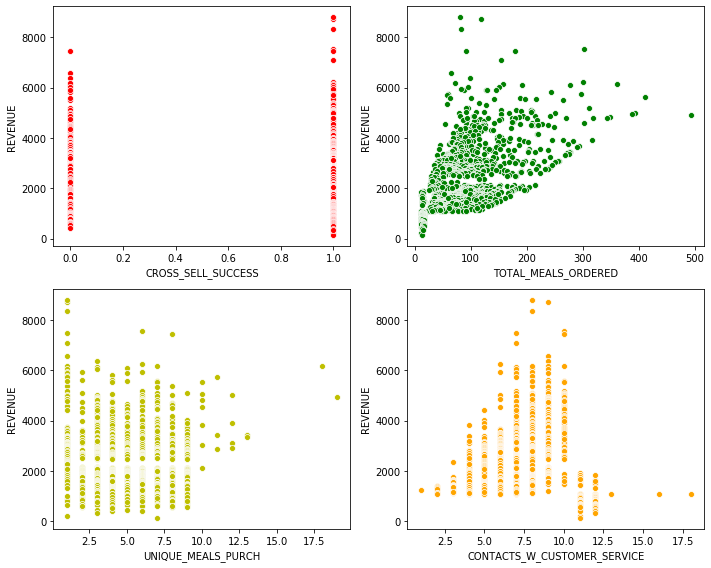

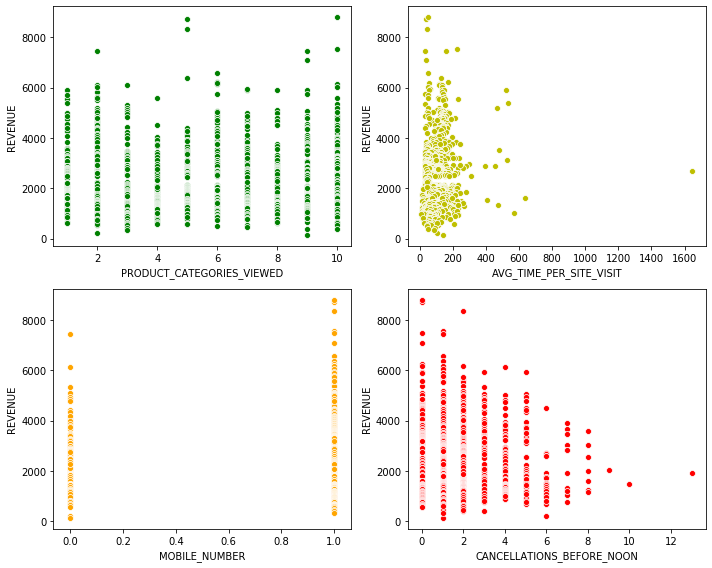

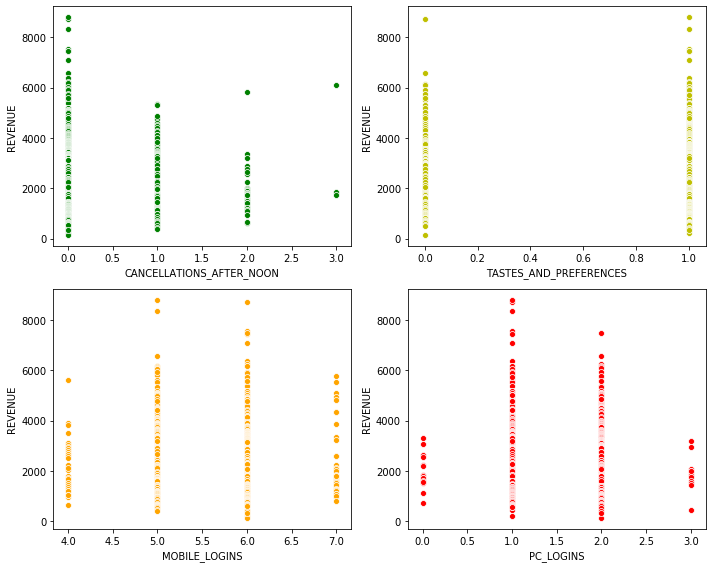

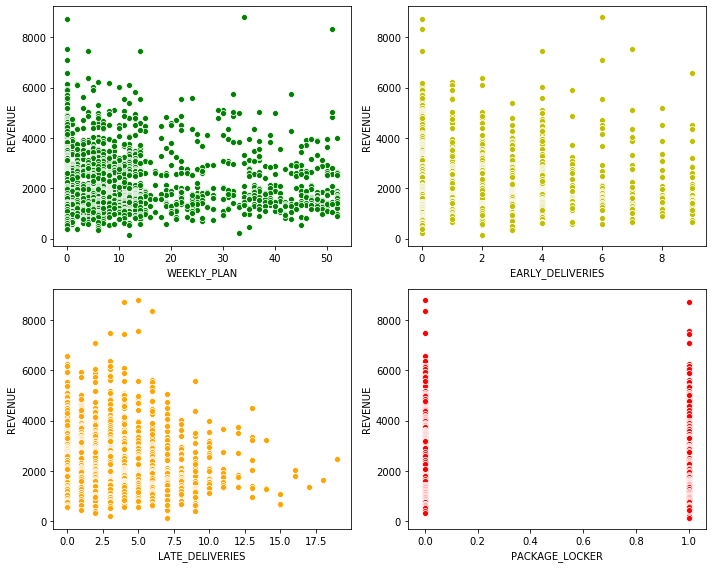

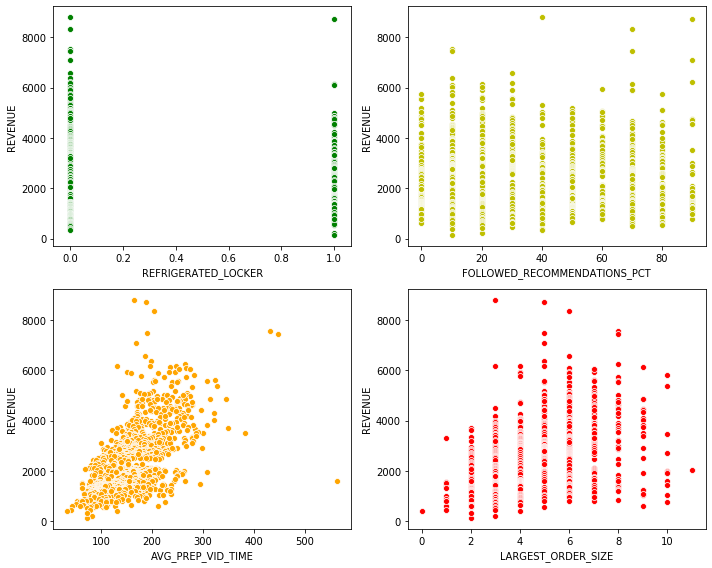

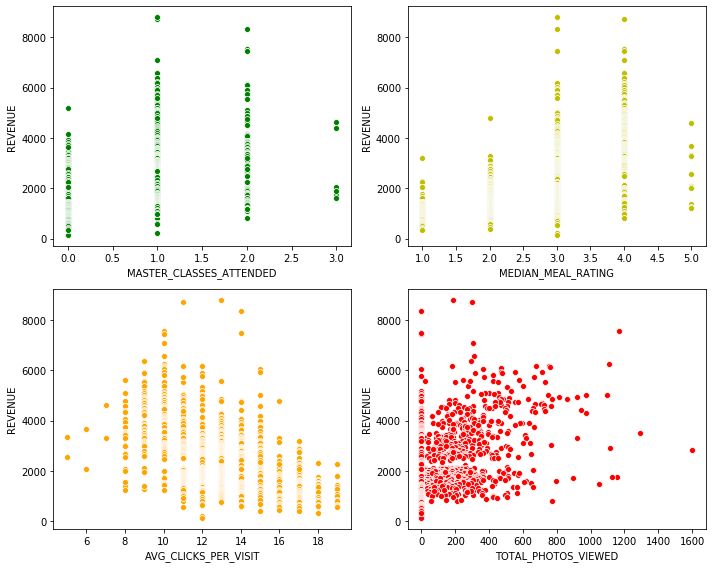

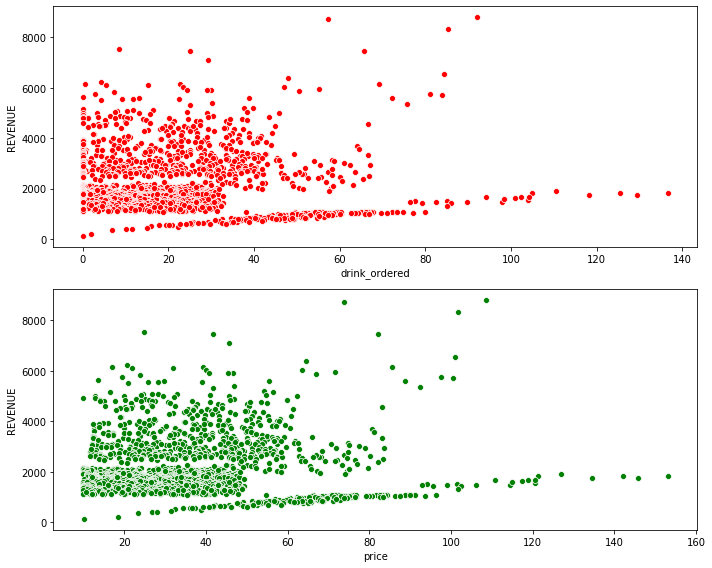

In [17]:
########################
# Visual EDA (Scatterplot)
########################

fig, ax = plt.subplots(figsize = (10, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['CROSS_SELL_SUCCESS'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('CROSS_SELL_SUCCESS')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['TOTAL_MEALS_ORDERED'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['UNIQUE_MEALS_PURCH'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['CONTACTS_W_CUSTOMER_SERVICE'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
plt.tight_layout()
plt.savefig('Kitchen Data Scatterplot 1 of 7.png')
plt.show()


########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['PRODUCT_CATEGORIES_VIEWED'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['AVG_TIME_PER_SITE_VISIT'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['MOBILE_NUMBER'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('MOBILE_NUMBER')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['CANCELLATIONS_BEFORE_NOON'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')
plt.tight_layout()
plt.savefig('Kitchen Data Scatterplot 2 of 7.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['CANCELLATIONS_AFTER_NOON'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['TASTES_AND_PREFERENCES'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('TASTES_AND_PREFERENCES')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['MOBILE_LOGINS'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('MOBILE_LOGINS')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['PC_LOGINS'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('PC_LOGINS')
plt.tight_layout()
plt.savefig('Kitchen Data Scatterplot 3 of 7.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['WEEKLY_PLAN'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('WEEKLY_PLAN')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['EARLY_DELIVERIES'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('EARLY_DELIVERIES')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['LATE_DELIVERIES'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('LATE_DELIVERIES')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['PACKAGE_LOCKER'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('PACKAGE_LOCKER')
plt.tight_layout()
plt.savefig('Kitchen Data Scatterplot 4 of 7.png')
plt.show()


########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['REFRIGERATED_LOCKER'],
                y = original_df['REVENUE'],
             color = 'g')
plt.xlabel('REFRIGERATED_LOCKER')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['AVG_PREP_VID_TIME'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('AVG_PREP_VID_TIME')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['LARGEST_ORDER_SIZE'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('LARGEST_ORDER_SIZE')
plt.tight_layout()
plt.savefig('Kitchen Data Scatterplot 5 of 7.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['MASTER_CLASSES_ATTENDED'],
             y = original_df['REVENUE'],
             color = 'g')
plt.xlabel('MASTER_CLASSES_ATTENDED')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['MEDIAN_MEAL_RATING'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('MEDIAN_MEAL_RATING')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['AVG_CLICKS_PER_VISIT'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('AVG_CLICKS_PER_VISIT')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['TOTAL_PHOTOS_VIEWED'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('TOTAL_PHOTOS_VIEWED')
plt.tight_layout()
plt.savefig('Kitchen Data Scatterplot 6 of 7.png')
plt.show()

########################
########################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 1, 1)
sns.scatterplot(x = original_df['drink_ordered'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('drink_ordered')

########################
plt.subplot(2, 1, 2)
sns.scatterplot(x = original_df['price'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('price')
plt.tight_layout()
plt.savefig('Kitchen Data Scatterplot 7 of 7.png')
plt.show()